# Driving Behavior
### Carlos Javier Leal Beltran A01741355
### Carlos Moises Chavez Jimenez A01637322
### Ernesto Adrian Alvarez Salazar A00227490
### Luis Armando Salazar Lopez A0114901


In [32]:
# Importando las librerías
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Importando los datos
t_test=pd.read_csv('/content/drive/Shareddrives/Concentracion - IA para Ciencia de Datos/Reto/Dataset Driving/test_motion_data.csv')
t_train=pd.read_csv('/content/drive/Shareddrives/Concentracion - IA para Ciencia de Datos/Reto/Dataset Driving/train_motion_data.csv')

# Tratamiento y Muestreo Inicial de los Datos

In [34]:
# Imprimimos los datos obtenidos del csv de prueba
t_test

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,SLOW,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,SLOW,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,SLOW,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,SLOW,820708


In [35]:
# Imprimimos los datos obtenidos del csv de entrenamiento
t_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [36]:
# Veremos también la cantidad de registros y variables que tenemos disponibles
Nrows = t_train.shape[0]
Ncols = t_train.shape[1]

print("Number of persons (rows)  = {0:0d}".format(Nrows))
print("Number of variables(columns)   = {0:0d}".format(Ncols))

Number of persons (rows)  = 3644
Number of variables(columns)   = 8


In [37]:
# Haremos un resúmen a grandes rasgos de la información disponible
t_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


In [38]:
# Mostraremos el tipo de dato de cada variable de la bd
t_train.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Class         object
Timestamp      int64
dtype: object

In [39]:
# Función para revisar que el dataset de training no tenga datos faltantes
pd.isna(t_train).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [40]:
# Función para revisar que el dataset de testing no tenga datos faltantes
pd.isna(t_test).sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

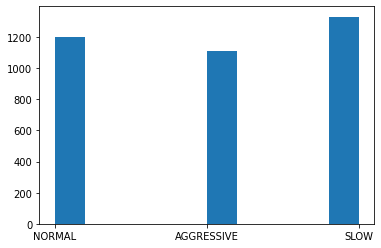

In [41]:
# Conteo de tipos de conductores
plt.hist(t_train['Class'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


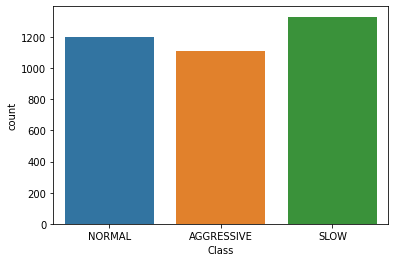

In [42]:
import seaborn as sns
sns.countplot('Class',data = t_train)
plt.show()

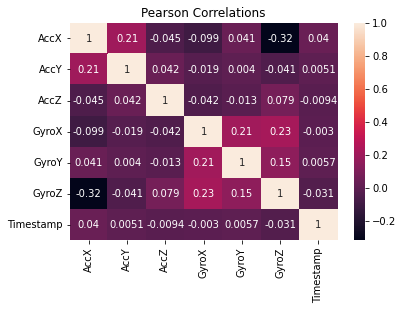

In [43]:
# Calcularemos la correlación entre las variables
ax = sns.heatmap(t_train.corr(), annot=True).set(title='Pearson Correlations');

In [44]:
# Clasificaremos nuestras variables conforme al tipo de conductor
t_trainSlow = t_train[t_train['Class']=='SLOW']
t_trainNormal = t_train[t_train['Class']=='NORMAL']
t_trainAggressive = t_train[t_train['Class']=='AGGRESSIVE']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


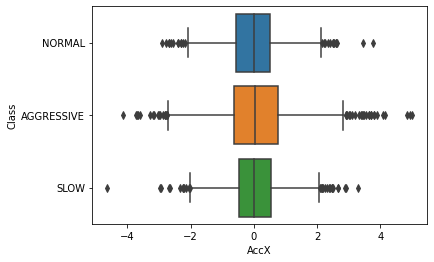

In [45]:
# Relizaremos diagramas de cajas y bigotes para conocer los valores atipicos
sns.boxplot(t_train['AccX'],y=t_train['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


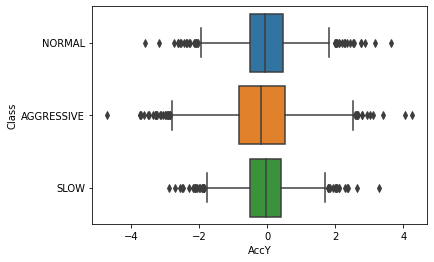

In [46]:
sns.boxplot(t_train['AccY'],y=t_train['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


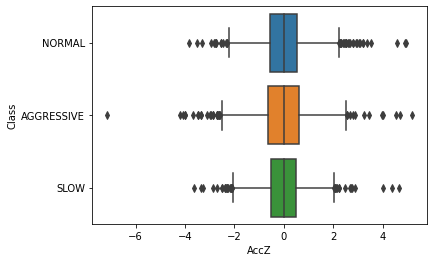

In [47]:
sns.boxplot(t_train['AccZ'],y=t_train['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


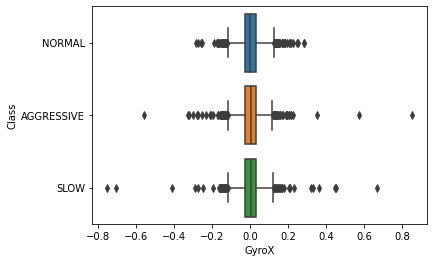

In [48]:
sns.boxplot(t_train['GyroX'],y=t_train['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


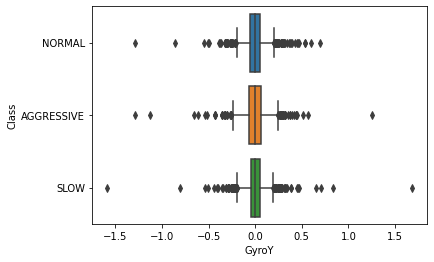

In [49]:
sns.boxplot(t_train['GyroY'],y=t_train['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


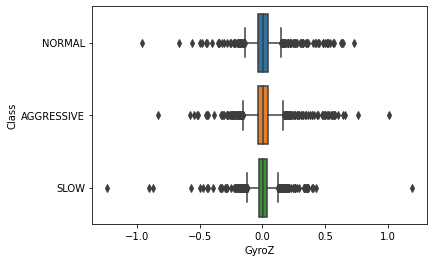

In [50]:
sns.boxplot(t_train['GyroZ'],y=t_train['Class'])

En el caso de nuestra base de datos para training, no tenemos datos nulos ni que parezcan ser erroneos. Tenemos varios datos que se consideran outliers al revisar los boxplots por clases, estos datos no se eliminaran debido a la naturaleza del problema.